In [8]:
!pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

$ \frac {\partial E}{\partial W} = \frac {\partial E}{\partial Y}   \frac {\partial Y}{\partial W}$


$ \frac {\partial E}{\partial X} = \frac {\partial E}{\partial Y}   \frac {\partial Y}{\partial X} $

#   Base  Layer
a layer has an input and an output,  x,y , to train we pass the partial derivative in respect of  the y to get   the gradient of the   weights and the partial derivative  in respect of the x to calculate grads on next layer

### Methods:
1. Forward: from input we get the output: x -> y
2. Backward: from partial  derivative of the error with respect to the output  we get  gradients and partial derivative of the error with   respect to the input.

In [9]:
# base layer implementation
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, x):
        # TODO
        pass

    def backward(self, output_grad, learning_rate):
        # TODO
        pass

# Dense Layer
a dense layer has i input neuron connected to the set of j output neurons, each x input neuron is connected to all y output neurons, each connection represents a weight, a weight is represented by $ w_{ij}$

so the output of the layer will be:
  $  y_{1} = x_{1} w_{11} + x_{2} w_{12} + ... + x_{i} w_{1i} + b_{1} $
  $  y_{2} = x_{1} w_{21} + x_{2} w_{22} + ... + x_{i} w_{2i} + b_{2} $
  $  y_{3} = x_{1} w_{31} + x_{2} w_{32} + ... + x_{i} w_{3i} + b_{3} $
  ...
  $  y_{j} = x_{1} w_{j1} + x_{2} w_{j2} + ... + x_{i} w_{ji} + b_{j} $

we can rewrite this as a matrix multiplication:
$ Y_{j \times i} = W_{j \times i}  * X_{i \times 1} + B_{j \times i}  $

In [10]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights =  np.random.randn(output_size, input_size)    # weights and biases initialized randomly
        self.bias = np.random.randn(output_size, 1)

    def forward(self, x):
        self.input = x
        return np.dot(self.weights,  self.input) + self.bias

    def backward(self, output_grad, learning_rate):
        weights_gradient = np.dot(output_grad, self.input.T)
        self.weights -= learning_rate * weights_gradient
        self.bias -=  learning_rate * output_grad
        return np.dot(self.weights.T, output_grad)


$\frac {\partial E}{\partial Y} = \[
\begin{bmatrix}
\frac{\partial E}{\partial y_1} \\
\frac{\partial E}{\partial y_2} \\
\vdots \\
\frac{\partial E}{\partial y_n}
\end{bmatrix}
\]


\to


\frac {\partial E}{\partial W} \[ =
  \left[ {\begin{array}{cccc}
    \frac {\partial E}{\partial w_{11}} & \frac {\partial E}{\partial w_{12}} & \cdots & \frac {\partial E}{\partial w_{1i}}\\
    \frac {\partial E}{\partial w_{21}} & \frac {\partial E}{\partial w_{22}} & \cdots & \frac {\partial E}{\partial w_{2i}}\\
    \vdots & \vdots & \ddots & \vdots\\
    \frac {\partial E}{\partial w_{j1}} & \frac {\partial E}{\partial w_{j2}} & \cdots & \frac {\partial E}{\partial w_{ji}}\\
  \end{array} } \right]
\]$

\
$ \frac {\partial E }{\partial w_{12}} = \frac { \partial E}{\partial y_1} x_2 \to \frac{\partial E}{\partial w_{ji}} = \frac {\partial  E}{\partial y_j}    $

$ \frac {\partial E}{\partial W} = \frac {\partial E}{\partial Y} X^t $
<br\>
$ \frac {\partial E}{\partial B} =  \frac {\partial E}{\partial Y} $
<br\>

$  \frac {\partial E}{\partial X} = \[
\begin{bmatrix}
\frac {\partial E}{\partial y_1}w_{11} + \frac {\partial E}{\partial y_2}w_{21} + \cdots + \frac {\partial E}{\partial y_j}w_{j1} \\
\frac {\partial E}{\partial y_1}w_{12} + \frac {\partial E}{\partial y_2}w_{22} + \cdots + \frac {\partial E}{\partial y_j}w_{j2} \\
\vdots \\
\frac {\partial E}{\partial y_1}w_{1i} + \frac {\partial E}{\partial y_2}w_{2i} + \cdots + \frac {\partial E}{\partial y_j}w_{ji}
\end{bmatrix}
\]_{i \times 1}
= \[
  \left[ {\begin{array}{cccc}
    w_{11} & w_{12} & \cdots & w_{j1}\\
    w_{21} & w_{22} & \cdots & w_{j2}\\
    \vdots & \vdots & \ddots & \vdots\\
    w_{1j} & w_{2j} & \cdots & w_{ij}\\
  \end{array} } \right]
\]_{i \times j}

\[
\begin{bmatrix}
\frac {\partial E}{\partial y_1} \\
\frac {\partial E}{\partial y_2} \\
\vdots \\
\frac {\partial E}{\partial y_j}
\end{bmatrix}
\]_{j \times 1}

= W^t * \frac {\partial E}{\partial Y}

$

# Activation layer
layer  that takes in input  neurons and passes them in a n activation function, thus input shape ==  output shape

$ Y = f(x) $

to  implement the backward pass we need   to  calulate the derivative of the error with  respect to the input, knowing the derivative of the error with respect to the output:

$\frac {\partial E}{\partial X} = \frac {\partial E}{\partial Y} \bigodot f'(X) $

In [11]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, x):
        self.input = x
        return self.activation(self.input)

    def backward(self, output_grad, learning_rate):
        return np.multiply(output_grad, self.activation_prime(self.input))


### Hyperbolic tangent activation function
implementing the non linear activation function tanh and its derivative

In [12]:
class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x) ** 2
        super().__init__(tanh,  tanh_prime)

### Mean Squared Error
MSE:

$   E = \frac{1}{n} \sum_{i} (y_i^* - y_i)^2 $


MSE':

$ \frac {\partial E}{\partial Y} = \frac{2}{n}(Y- y^*) $


In [13]:
def mse(y_true,y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2* (y_pred - y_true) / np.size(y_true)

### test
to see if the network can capture non linearly separable functions we do a quick sanity check  and try to solve XOR

1/10000, error=0.721755
2/10000, error=0.710812
3/10000, error=0.699544
4/10000, error=0.688848
5/10000, error=0.679497
6/10000, error=0.671685
7/10000, error=0.665284
8/10000, error=0.660050
9/10000, error=0.655737
10/10000, error=0.652128
11/10000, error=0.649046
12/10000, error=0.646352
13/10000, error=0.643939
14/10000, error=0.641722
15/10000, error=0.639635
16/10000, error=0.637627
17/10000, error=0.635656
18/10000, error=0.633687
19/10000, error=0.631691
20/10000, error=0.629643
21/10000, error=0.627522
22/10000, error=0.625307
23/10000, error=0.622981
24/10000, error=0.620525
25/10000, error=0.617923
26/10000, error=0.615159
27/10000, error=0.612214
28/10000, error=0.609073
29/10000, error=0.605717
30/10000, error=0.602128
31/10000, error=0.598286
32/10000, error=0.594170
33/10000, error=0.589758
34/10000, error=0.585028
35/10000, error=0.579954
36/10000, error=0.574510
37/10000, error=0.568667
38/10000, error=0.562396
39/10000, error=0.555662
40/10000, error=0.548432
41/10000,

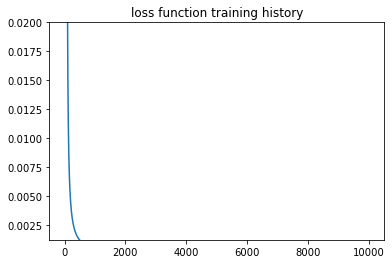

In [14]:
X = np.reshape([[0,0], [0,1], [1,0],[1,1]], (4,2,1))
Y = np.reshape([[0], [1], [1], [0]], (4,1,1))

network = [
    Dense(2,3),
    Tanh(),
    Dense(3,1),
    Tanh()
]

epochs =  10000
lr = 0.1

# train
def train(network, mse, mse_prime, x_train, y_train, epochs=100, learning_rate=0.1):
    loss_history = np.zeros(epochs)

    for e in range(epochs):
        error = 0
        for x,y in zip(x_train,y_train):
            # forward
            output = x
            for layer in network:
                output = layer.forward(output)

            error += mse(y,output)
            # backward
            grad =  mse_prime(y, output)
            for layer in reversed(network):
                grad= layer.backward(grad, learning_rate)

        error /= len(x)
        print('%d/%d, error=%f' % (e + 1, epochs, error))
        loss_history[e] = error

    plt.plot(loss_history, label="Training loss")
    plt.xlabel='epoch'
    plt.ylim(0.00125,0.02)
    plt.title('loss function training history');

train(network, mse, mse_prime, X, Y, epochs=epochs, learning_rate=lr)

### MNIST
now lets solve MNIST handwritten digits recognition for a more real word-like example

11501568/11490434 [==============================] - 2s 0us/step
1/100, error=1.143188
2/100, error=1.013002
3/100, error=0.978823
4/100, error=0.927912
5/100, error=0.880784
6/100, error=0.791591
7/100, error=0.653250
8/100, error=0.509001
9/100, error=0.382055
10/100, error=0.289669
11/100, error=0.223430
12/100, error=0.182831
13/100, error=0.157609
14/100, error=0.146633
15/100, error=0.140314
16/100, error=0.135595
17/100, error=0.132587
18/100, error=0.130193
19/100, error=0.128012
20/100, error=0.126334
21/100, error=0.124976
22/100, error=0.123218
23/100, error=0.121630
24/100, error=0.119819
25/100, error=0.118223
26/100, error=0.116818
27/100, error=0.115518
28/100, error=0.114397
29/100, error=0.113301
30/100, error=0.112250
31/100, error=0.111221
32/100, error=0.110302
33/100, error=0.109253
34/100, error=0.108038
35/100, error=0.106900
36/100, error=0.105901
37/100, error=0.105140
38/100, error=0.104303
39/100, error=0.103640
40/100, error=0.102840
41/100, error=0.102152
4

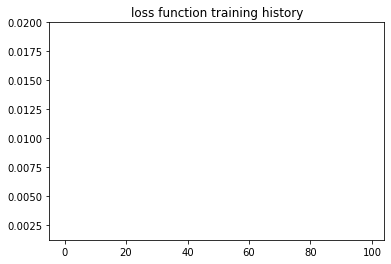

In [16]:
from keras.datasets import mnist
from keras.utils import np_utils

def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output


def preprocess_data(x, y, limit):
    # reshape and normalize input data
    x = x.reshape(x.shape[0], 28 * 28, 1)
    x = x.astype("float32") / 255
    # encode output which is a number in range [0,9] into a vector of size 10
    # e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    y = np_utils.to_categorical(y)
    y = y.reshape(y.shape[0], 10, 1)
    return x[:limit], y[:limit]


# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 1000)
x_test, y_test = preprocess_data(x_test, y_test, 20)

# neural network
network = [
    Dense(28 * 28, 64), Tanh(),  Dense(64, 10),  Tanh()]
# train
train(network, mse, mse_prime, x_train, y_train, epochs=100, learning_rate=0.1)

# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))